In [160]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#timer
%pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.


In [385]:
# importing the heart dataset with pandas
df = pd.read_csv('heart.csv')
print(df.columns)
df.describe()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [162]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [163]:
#check df to see if there are any null entries

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [386]:
#drop the target column for our x
x = df.iloc[:,:-1]

In [376]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [387]:
#our target column y
y = df.iloc[:,-1]

In [378]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [169]:
#mean is 54.4% means around 1 in 2 will get heart disease
y.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'sex'),
 Text(0, 2.5, 'cp'),
 Text(0, 3.5, 'trestbps'),
 Text(0, 4.5, 'chol'),
 Text(0, 5.5, 'fbs'),
 Text(0, 6.5, 'restecg'),
 Text(0, 7.5, 'thalach'),
 Text(0, 8.5, 'exang'),
 Text(0, 9.5, 'oldpeak'),
 Text(0, 10.5, 'slope'),
 Text(0, 11.5, 'ca'),
 Text(0, 12.5, 'thal'),
 Text(0, 13.5, 'target')]

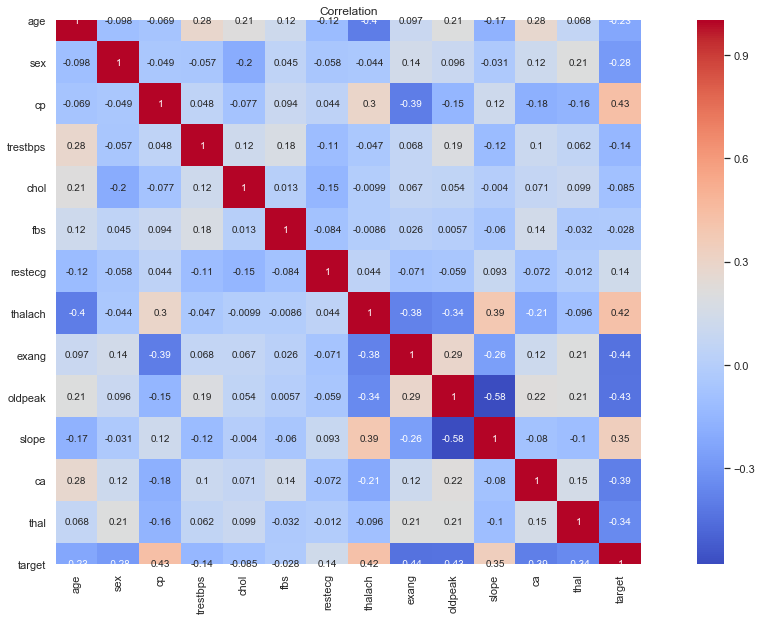

In [170]:
corr = df.corr()
plt.figure(figsize=(20,10))


plt.title('Correlation')
heatmap = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'coolwarm', annot = True,annot_kws={'size':10}, square = True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=360)


In [360]:
#splitting the dataset in 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [172]:
#check y_train, our target feature
#the mean is around 54.9%, means 1 in 2 will get heart disease, same as our original data.

y_train.describe()

count    242.000000
mean       0.549587
std        0.498566
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
#Our problem is a classification and regression problem. 
#We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). 
#We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset.

#However, we will still try to use some unsupervised learning model to see if we can get any result

In [178]:
%%time
#Log regression will be used first so that we can see how the independent variables affect the dependent variable
#train our model

#initilize

logreg = LogisticRegression(solver = 'lbfgs' ,max_iter = 10000)



Wall time: 0 ns


In [180]:
%%time
#train the model

logreg.fit(x_train, y_train)

Wall time: 88.4 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
#accuracy score for log regression
y_pred = logreg.predict(x_test)

log_acc_score = accuracy_score(y_test,y_pred)
print(log_acc_score)

0.8524590163934426


In [191]:
#confusion matrix for log regression
confusion_matrix(y_test, y_pred , labels =[0,1])

#this means 25 0 predicted correctly, 4 0 predicted wrongly as 1
#27 1 predicted correctly, 5 1 predicted wrongly as 0

array([[25,  4],
       [ 5, 27]], dtype=int64)

In [185]:

log_rec_score = recall_score(y_test,y_pred)
print(log_rec_score)

0.84375


In [188]:
log_pre_score = precision_score(y_test,y_pred)
print(log_pre_score)

0.8709677419354839


In [189]:

log_f1_score = f1_score(y_test,y_pred)
print(log_f1_score)

0.8571428571428571


# We try use selectKBest to see if improves our score or not

In [264]:

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, SelectFpr, f_regression
#try to see if we reduce number of features, will it improve the score

In [265]:
%%time
x_new1 = SelectKBest(f_regression, k = 7).fit_transform(x,y)
print(x_new1.shape)

(303, 7)
Wall time: 2.03 ms


In [225]:
#For heart disease data modeling, anything that doesn't account for false-negatives is a crime. 
#this is because false negative is more disastrous, imagine telling someone they dont have heart disease, but in fact they do.
#Recall is a better measure than precision in such a case.
# k 7 and 5 gives same accuracy score, but for 7, the recall score is higher

In [230]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.2, random_state=42)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
log_acc_k_score = accuracy_score(y_test,y_pred)
print(log_acc_k_score)


0.8852459016393442
Wall time: 19.4 ms


In [227]:

log_acc_k_score = accuracy_score(y_test,y_pred)
print(log_acc_k_score)

0.8852459016393442


In [232]:
log_rec_k_score = recall_score(y_test,y_pred)
print(log_rec_k_score)

0.90625


In [233]:

log_pre_k_score = precision_score(y_test,y_pred)
print(log_pre_k_score)

0.8787878787878788


In [234]:

log_f1_k_score = f1_score(y_test,y_pred)
print(log_f1_k_score)

0.8923076923076922


In [235]:
confusion_matrix(y_test, y_pred , labels =[0,1])

array([[25,  4],
       [ 3, 29]], dtype=int64)

# when we select k = 7, accruacy improves

In [236]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Try Scaling to see if result improves. chol max rang goes very high as compared to the others, we try to scale the data to see if it improves the result.

In [237]:
from sklearn import preprocessing
normalizedx = preprocessing.scale(x)
print(normalizedx.shape)
print(normalizedx)

(303, 13)
[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [238]:
x_new1 = SelectKBest(f_regression, k = 7).fit_transform(normalizedx,y)
print(x_new1.shape)
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.2, random_state=42)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
accuracy_score(y_test,y_pred)

(303, 7)


0.8852459016393442

In [239]:
recall_score(y_test, y_pred)

0.90625

In [240]:
precision_score(y_test, y_pred)

0.8787878787878788

In [241]:
confusion_matrix(y_test, y_pred , labels =[0,1])

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [37]:
#normalizing didnt affect the scores at all, maybe it's becuase most of the x variables have low standard deviation

# No plans to test overfitting, as our target means is quite balance, around 50%, the data is not skewed

# Hence, for our dataset, for all the models, we will do comparison with and without selectKBest

# Now we test for KNN

In [266]:
dataset = pd.DataFrame(df,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"])
df_zero=dataset.loc[dataset["target"]==0]
df_one=dataset.loc[dataset["target"]==1]
print(dataset.head())
print(df_one.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178   

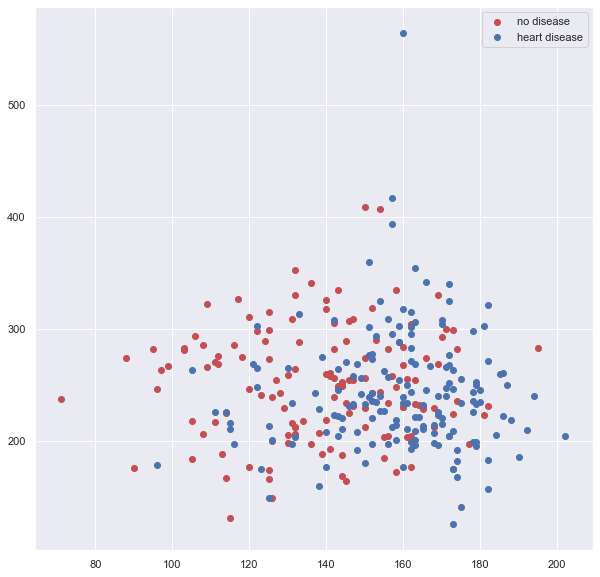

In [267]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df_zero['thalach'],df_zero['chol'], c ='r', label = 'no disease')
ax.scatter(df_one['thalach'],df_one['chol'],c = 'b', label = 'heart disease')
plt.legend()
plt.show()

In [300]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train.describe()

count    242.000000
mean       0.549587
std        0.498566
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [301]:
%%time
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(x_train,y_train)

Wall time: 971 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [302]:
y_pred = knn_model.predict(x_test)


In [303]:
knn_acc_score = accuracy_score(y_test,y_pred)
print(knn_acc_score)

0.7540983606557377


In [304]:

knn_rec_score = recall_score(y_test,y_pred)
print(knn_rec_score)

0.8125


In [305]:

knn_pre_score = precision_score(y_test,y_pred)
print(knn_pre_score)

0.7428571428571429


In [306]:
knn_f1_score = f1_score(y_test,y_pred)
print(knn_f1_score)

0.7761194029850748


In [307]:
confusion_matrix(y_test, y_pred, labels = [0,1])

array([[20,  9],
       [ 6, 26]], dtype=int64)

# trail and error, 11 n neighbor best accruacy score, 0.754

# We use selectKBEST now to see if accruacy score changes

In [308]:
x_new1 = SelectKBest(f_regression, k = 3).fit_transform(x,y)
print(x_new1.shape)

(303, 3)


In [309]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.2, random_state=42)
knn_model.fit(x_train,y_train)



Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [310]:
y_pred = knn_model.predict(x_test)

In [316]:
y_pred = knn_model.predict(x_test)
knn_acc_k_score = accuracy_score(y_test,y_pred)
print(knn_acc_k_score)

0.7868852459016393


In [312]:
knn_rec_k_score = recall_score(y_test,y_pred)
print(knn_rec_k_score)

0.8125


In [313]:
knn_pre_k_score = precision_score(y_test,y_pred)
print(knn_pre_k_score)

0.7878787878787878


In [314]:
knn_f1_k_score = f1_score(y_test,y_pred)
print(knn_f1_k_score)

0.8


In [315]:
confusion_matrix(y_test, y_pred, labels = [0,1])

array([[22,  7],
       [ 6, 26]], dtype=int64)

# selectKBest does improve the score for KKN, but still log reg result better


# Now we try decision tree

In [379]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train.describe()

count    242.000000
mean       0.549587
std        0.498566
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [380]:
%%time
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

Wall time: 1.96 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [381]:
y_pred = dt.predict(x_test)
dt_acc_score = accuracy_score(y_test,y_pred)
print(dt_acc_score)

0.819672131147541


In [382]:
dt_rec_score = recall_score(y_test,y_pred)
print(dt_rec_score)

0.78125


In [383]:
dt_pre_score = precision_score(y_test,y_pred)
print(dt_pre_score)

0.8620689655172413


In [384]:
dt_f1_score = f1_score(y_test,y_pred)
print(dt_f1_score)

0.8196721311475409


In [373]:
confusion_matrix(y_test, y_pred, labels = [0,1])

array([[27,  2],
       [ 8, 24]], dtype=int64)

In [85]:
import os



from sklearn import tree
import graphviz
from graphviz import Source 

In [87]:
%%time
Source(tree.export_graphviz(dt, out_file='tree.dot', class_names=['No', 'Yes'], feature_names= x_train.columns))
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

Wall time: 13.6 s


# We use selectKBEST on decision tree to see if accruacy score changes

In [388]:
x_new1 = SelectKBest(f_regression, k = 10).fit_transform(x,y)
print(x_new1.shape)

(303, 10)


In [389]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.2, random_state=42)
dt.fit(x_train,y_train)


Wall time: 999 µs


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [396]:
y_pred = dt.predict(x_test)
dt_acc_k_score = accuracy_score(y_test,y_pred)
print(dt_acc_k_score)

0.8360655737704918


In [392]:
dt_rec_k_score = recall_score(y_test,y_pred)
print(dt_rec_k_score)

0.75


In [393]:
dt_pre_k_score = precision_score(y_test,y_pred)
print(dt_pre_k_score)

0.9230769230769231


In [394]:
dt_f1_k_score = f1_score(y_test,y_pred)
print(dt_f1_k_score)

0.8275862068965517


In [395]:
confusion_matrix(y_test,y_pred, labels = [0,1])

array([[27,  2],
       [ 8, 24]], dtype=int64)

# Again, selectKBest improves the result. however, the result from decision tree isn't as good as log reg

In [408]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold= KFold(n_splits=10, shuffle= True, random_state=0)
#DecisionTree 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scoring= 'accuracy'
score= cross_val_score(classifier, x_train,y_train,cv=k_fold, n_jobs=1, scoring=scoring, error_score=np.nan)
print(score)

[0.76       0.84       0.75       0.75       0.66666667 0.625
 0.75       0.91666667 0.79166667 0.79166667]


In [409]:
#Score from Cross Validation
cv_dt=round(np.mean(score)*100,2)
print(cv_dt)

76.42


In [410]:
#Logistic Regression
logReg=LogisticRegression(solver='liblinear')
scoring= 'accuracy'
score= cross_val_score(logReg, x_train,y_train,cv=k_fold, n_jobs=1, scoring=scoring, error_score=np.nan)
print(score)

[0.8        0.8        0.91666667 0.91666667 0.75       0.83333333
 0.83333333 0.79166667 0.95833333 0.79166667]


In [411]:
#Score from Cross Validation
cv_lr=round(np.mean(score)*100,2)
print(cv_lr)

83.92


In [414]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors = 11)
scoring= 'accuracy'
score= cross_val_score(knn_model, x_train,y_train,cv=k_fold, n_jobs=1, scoring=scoring, error_score=np.nan)
print(score)

[0.6        0.6        0.66666667 0.75       0.54166667 0.66666667
 0.625      0.625      0.66666667 0.66666667]


In [415]:
#Score from Cross Validation
cv_knn=round(np.mean(score)*100,2)
print(cv_knn)

64.08


In [416]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-Nearest Neighbors','Decision Tree Classifier'],
    
    'acc_score': [log_acc_score, knn_acc_score, dt_acc_score],
    'acc_k_score': [log_acc_k_score,knn_acc_k_score, dt_acc_k_score],
    'rec_score':[log_rec_score,knn_rec_score,dt_rec_score],
    'rec_k_score':[log_rec_k_score,knn_rec_k_score,dt_rec_k_score],
    'pre_score': [log_pre_score,knn_pre_score,dt_pre_score],
    'pre_k_score':[log_pre_k_score,knn_pre_k_score,dt_pre_k_score],
    'f1_score':[log_f1_score,knn_f1_score,dt_f1_score],
    'f1_k_score':[log_f1_score,knn_f1_k_score,dt_f1_k_score],
    'CV Score':[cv_lr,cv_knn,cv_dt]
                    })

In [417]:
models.sort_values(by=['acc_score', 'acc_k_score'], ascending=False)

,Model,acc_score,acc_k_score,rec_score,rec_k_score,pre_score,pre_k_score,f1_score,f1_k_score,CV Score
0,Logistic Regression,0.852459,0.885246,0.84375,0.90625,0.870968,0.878788,0.857143,0.857143,83.92
2,Decision Tree Classifier,0.819672,0.836066,0.78125,0.75000,0.862069,0.923077,0.819672,0.827586,76.42
1,k-Nearest Neighbors,0.754098,0.786885,0.81250,0.81250,0.742857,0.787879,0.776119,0.800000,64.08
